In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
%matplotlib inline

In [2]:
dataDir='c:/users/student/cocoapi/dataset/train'
#dataType='val2017'
annFile='{}/deepfashion2train.json'.format(dataDir)

In [3]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=96.50s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
short_sleeved_shirt long_sleeved_shirt short_sleeved_outwear long_sleeved_outwear vest sling shorts trousers skirt short_sleeved_dress long_sleeved_dress vest_dress sling_dress

COCO supercategories: 
clothes


In [8]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['short_sleeved_shirt','long_sleeved_shirt','long_sleeved_outwear','vest','sling','shorts','trousers', 'skirt', 'short_sleeved_dress', 'long_sleeved_dress', 'vest_dress', 'sling_dress']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [999])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[999]

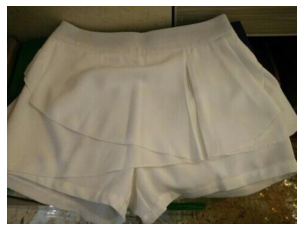

In [9]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread('{}/image/'.format(dataDir)+img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

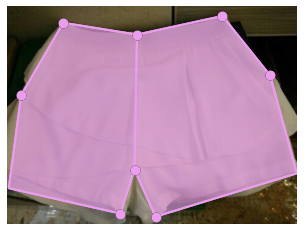

In [10]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)